In [32]:
import sys, os
mainpath = os.path.abspath(os.path.dirname(sys.argv[0]))
sys.path.append(mainpath)

import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle
import math
# import mediapipe as mp
import joblib

In [33]:
heads = {}
i = 0

# folder_path = "AFLW2000-3D/AFLW2000/"
folder_path = os.getcwd()
png_files = glob.glob(os.path.join(folder_path, "*.png"))

# Retrieve .jpg files
jpg_files = glob.glob(os.path.join(folder_path, "*.jpg"))

# Combine both lists
jpg_files = png_files + jpg_files  # Note: Renaming to jpg_files as per your original variable, but consider a more descriptive name like all_image_files

print(f"Found {len(jpg_files)} .png files in {folder_path}")

for image_path in jpg_files:
    image_name = os.path.basename(image_path)

    pickle_name = image_name[0:-7] + "height.pkl"
    
    try:
        with open(pickle_name, 'rb') as file:
            loaded_data = pickle.load(file)
        # print("Loaded data:", loaded_data)
        # print(loaded_data["height_m"].shape)
        # print(type(loaded_data["height_m"]))
    except FileNotFoundError:
        print(f"Error: The file {pickle_name} was not found.")
    except pickle.PicklingError:
        print("Error: Failed to load the pickle file.")

    image = cv2.imread(os.path.join(folder_path, image_name))
    # print("Image:", image_name, "Shape:", image.shape)
    
    sobel_x = cv2.Sobel(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.CV_64F, 1, 0, ksize=3) # Horizontal
    sobel_y =  cv2.Sobel(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY), cv2.CV_64F, 0, 1, ksize=3) # Vertical
    
    heads[image_name] = {
        "im_rgb": cv2.cvtColor(image, cv2.COLOR_RGB2BGR),
        "im_bgr": image,
        "im_gray": cv2.cvtColor(image, cv2.COLOR_RGB2GRAY),
        "im_height": loaded_data["height_m"],
        "im_gray_gaussian": cv2.GaussianBlur(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), (5, 5), 0),
        "im_sobel_x": sobel_x,  # Horizontal
        "im_sobel_y": sobel_y,  # Vertical
        "im_sobel_mag": cv2.normalize(np.sqrt(sobel_x**2 + sobel_y**2), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    }
    
    # output_path = f"{image_name[0:-4]}_head_pose.jpg"  # Save annotated image for each
    print(f"\nProcessing {image_name}...")
    # result = GetHeadPose(image_path, output_path)
    # print("Head Pose Euler Angles:", result['angles'])
    # print("Rotation Matrix (Camera to Head Frame):\n", result['camera_to_head_rotation'])
    i = i + 1
    if i >= 70:
        break
    #       # Wait for a key press indefinitely
   
    

# face_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_frontalface_default.xml'))
# eye_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_eye.xml'))
# mouth_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_mouth.xml'))
# nose_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_nose.xml'))
# profileface_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_profileface.xml'))
# left_ear_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_leftear.xml'))
# right_ear_cascade = cv2.CascadeClassifier(os.path.join(mainpath,'haarcascade_mcs_rightear.xml'))


# # Check if classifiers loaded successfully
# classifiers = [face_cascade, eye_cascade, mouth_cascade, nose_cascade, 
#               profileface_cascade, left_ear_cascade, right_ear_cascade]
# if any(c.empty() for c in classifiers):
#     print("Error: One or more cascade classifiers failed to load")


Found 62 .png files in /home/jestin/AMME5710_Major/src/stereo

Processing jestinp_28_rgb.png...

Processing jestin_17_rgb.png...

Processing jestinp_49_rgb.png...

Processing jestin_3_rgb.png...

Processing jestinp_37_rgb.png...

Processing jestin_14_rgb.png...

Processing jestinp_51_rgb.png...

Processing jestinp_21_rgb.png...

Processing jestin_16_rgb.png...

Processing jestinp_45_rgb.png...

Processing jestinp_33_rgb.png...

Processing jestin_4_rgb.png...

Processing jestin_5_rgb.png...

Processing jestinp_22_rgb.png...

Processing jestinp_42_rgb.png...

Processing jestinp_25_rgb.png...

Processing jestin_11_rgb.png...

Processing jestin_7_rgb.png...

Processing jestinp_40_rgb.png...

Processing jestin_13_rgb.png...

Processing jestin_6_rgb.png...

Processing jestinp_26_rgb.png...

Processing jestin_15_rgb.png...

Processing jestinp_41_rgb.png...

Processing jestinp_20_rgb.png...

Processing jestin_10_rgb.png...

Processing jestinp_18_rgb.png...

Processing jestin_8_rgb.png...

Proc

In [34]:
# ------------------------------------------------------------------
# 1. Define where the cascade XML files live
# ------------------------------------------------------------------
# Option A – same folder as this script (recommended if you placed them there)
cascade_dir = os.getcwd()              # e.g. /home/jestin/AMME5710_Major/src/stereo

# Option B – a dedicated sub-folder (uncomment if you prefer)
# cascade_dir = os.path.join(os.path.dirname(__file__), 'cascades')

# ------------------------------------------------------------------
# 2. Helper to load a cascade with a clear error message
# ------------------------------------------------------------------
def load_cascade(name):
    path = os.path.join(cascade_dir, name)
    if not os.path.isfile(path):
        print(f"ERROR: Cascade file not found → {path}")
        return cv2.CascadeClassifier()      # returns an empty classifier
    clf = cv2.CascadeClassifier(path)
    if clf.empty():
        print(f"ERROR: Failed to load cascade → {path}")
    else:
        print(f"Loaded: {name}")
    return clf

# ------------------------------------------------------------------
# 3. Load every classifier
# ------------------------------------------------------------------
face_cascade       = load_cascade('haarcascade_frontalface_default.xml')
eye_cascade        = load_cascade('haarcascade_eye.xml')
mouth_cascade      = load_cascade('haarcascade_mcs_mouth.xml')
nose_cascade       = load_cascade('haarcascade_mcs_nose.xml')
profileface_cascade= load_cascade('haarcascade_profileface.xml')
left_ear_cascade   = load_cascade('haarcascade_mcs_leftear.xml')
right_ear_cascade  = load_cascade('haarcascade_mcs_rightear.xml')

# ------------------------------------------------------------------
# 4. Final sanity check
# ------------------------------------------------------------------
classifiers = [
    ('Face',          face_cascade),
    ('Eye',           eye_cascade),
    ('Mouth',         mouth_cascade),
    ('Nose',          nose_cascade),
    ('Profile Face',  profileface_cascade),
    ('Left Ear',      left_ear_cascade),
    ('Right Ear',     right_ear_cascade),
]

failed = [name for name, clf in classifiers if clf.empty()]
if failed:
    raise RuntimeError(f"Cascade loading failed for: {', '.join(failed)}")
else:
    print("\nAll cascade classifiers loaded successfully.\n")

Loaded: haarcascade_frontalface_default.xml
Loaded: haarcascade_eye.xml
Loaded: haarcascade_mcs_mouth.xml
Loaded: haarcascade_mcs_nose.xml
Loaded: haarcascade_profileface.xml
Loaded: haarcascade_mcs_leftear.xml
Loaded: haarcascade_mcs_rightear.xml

All cascade classifiers loaded successfully.



In [35]:
# head = heads["jestin_1_rgb.png"]
# head = heads["jestin_2_rgb.png"]
# head = heads["jestin_3_rgb.png"]
head = heads["jestin_4_rgb.png"]
# head = heads["jestin_5_rgb.png"]
# head = heads["jestin_6_rgb.png"]
# head = heads["jestin_7_rgb.png"]
# head = heads["jestin_8_rgb.png"]

# head = heads["jestin_9_rgb.png"]
# 
# head = heads["jestin_10_rgb.png"]
# head = heads["jestin_11_rgb.png"]
# head = heads["jestin_12_rgb.png"]
# head = heads["jestin_13_rgb.png"]
# head = heads["jestin_14_rgb.png"]
# head = heads["jestin_15_rgb.png"]
# head = heads["jestin_16_rgb.png"]
# head = heads["jestin_17_rgb.png"]
# head = heads["jestin_18_rgb.png"]
# head = heads["jestin_19_rgb.png"]

# strin = 46
# head = heads[f"jestinp_{strin}_rgb.png"]


# head = heads["emily1.jpg"]
# head = heads["emily2.jpg"]
# head = heads["emily3.jpg"]
# head = heads["emily4.jpg"]
# head = heads["emily5.jpg"]
# head = heads["emily6.jpg"]
# head = heads["emily7.jpg"]
# head = heads["emily8.jpg"]
# head = heads["emily9.jpg"]
# head = heads["emily10.jpg"]


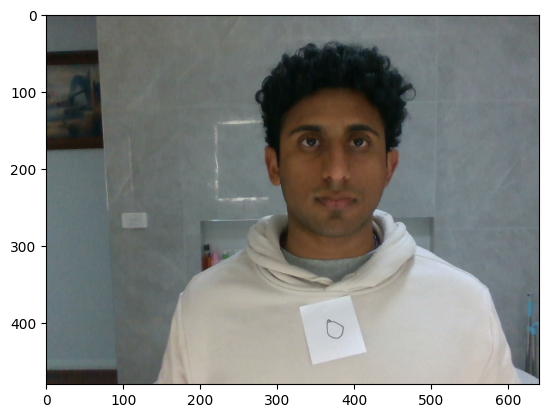

In [36]:

img1 = head["im_rgb"].copy()  # Create a copy to avoid modifying the original
img2 = head["im_rgb"].copy()  # Create a copy to avoid modifying the original
height_m = head["im_height"].copy()

# Convert to grayscale and apply Gaussian blur
gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

if len(faces) == 0:
    print("No frontal face detected, trying profile face detector")
    faces = profileface_cascade.detectMultiScale(gray, 1.3, 5)

if len(faces) == 0:
    print("No faces detected")
    # return

arr = height_m.copy().astype(float)
rows, cols = arr.shape
for i in range(rows):
    for j in range(cols):
        if np.isnan(arr[i, j]):
            neighbors = []
            # 4-connectivity: up, down, left, right
            for di, dj in [(-1,0), (1,0), (0,-1), (0,1)]:
                ni, nj = i + di, j + dj
                if 0 <= ni < rows and 0 <= nj < cols and not np.isnan(arr[ni, nj]):
                    neighbors.append(arr[ni, nj])
            if neighbors:
                arr[i, j] = np.mean(neighbors)
height_m = arr

plt.imshow(img1)

In [37]:
# Finding Face
x, y, w, h = faces[0]

# Draw rectangle around face
cv2.rectangle(img2, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Annotate corners with coordinates
tl = f"({x},{y})"
tr = f"({x+w},{y})"
bl = f"({x},{y+h})"
br = f"({x+w},{y+h})"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
thickness = 1
cv2.putText(img2, tl, (x-5, y-5), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, tr, (x+w+5, y-5), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, bl, (x-5, y+h+15), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, br, (x+w+5, y+h+15), font, font_scale, (0, 0, 0), thickness+1)
cv2.putText(img2, tl, (x-5, y-5), font, font_scale, (255, 255, 255), thickness)
cv2.putText(img2, tr, (x+w+5, y-5), font, font_scale, (255, 255, 255), thickness)
cv2.putText(img2, bl, (x-5, y+h+15), font, font_scale, (255, 255, 255), thickness)
cv2.putText(img2, br, (x+w+5, y+h+15), font, font_scale, (255, 255, 255), thickness)

# Extract ROI for facial features
roi_gray = gray[y:y+h, x:x+w]
roi_height = height_m[y:y+h, x:x+w]
eyes = eye_cascade.detectMultiScale(roi_gray)
nose = nose_cascade.detectMultiScale(roi_gray)
mouth = mouth_cascade.detectMultiScale(roi_gray)

features = {'face': (x, y, w, h)}

# Draw reference lines
cv2.line(img2, (x + int(w/2), y), (x + int(w/2), y + h), (255, 255, 255), 1)
cv2.line(img2, (x, y + int(h/3)), (x + w, y + int(h/3)), (255, 255, 255), 1)
cv2.line(img2, (x, y + int(h/2)), (x + w, y + int(h/2)), (255, 255, 255), 1)
cv2.line(img2, (x, y + int(3*h/5)), (x + w, y + int(3*h/5)), (255, 255, 255), 1)


print("found a face")
print(h, w, "head box dimensions")
# fig = plt.figure(figsize=(10, 10))
# plt.subplot(121)
# plt.imshow(roi_height, cmap='jet')
# plt.subplot(122)
# plt.imshow(img2)


# # plt.imshow(img2)
# plt.axis('off')
# plt.show()


found a face
176 176 head box dimensions


Left eye detected at: (341, 165)
Right eye detected at: (404, 165)
EYES valid


/tmp/ipykernel_7014/3791540417.py:67: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  np.cross(planar_vec, perp_eye_axis_vec),   # sine term (determines sign)


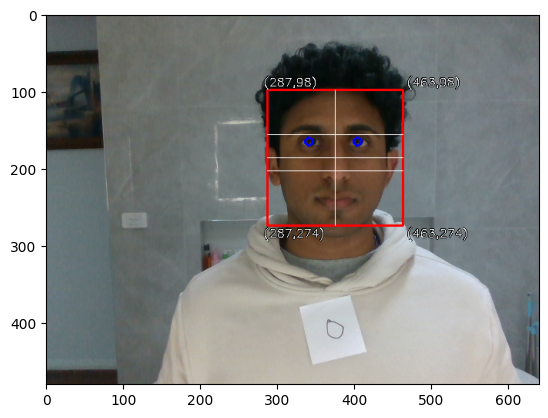

In [38]:
# Finding eyes
exp = 10

for (ex, ey, ew, eh) in eyes:
    center = (int(x + ex + ew/2), int(y + ey + eh/2))

    if center[0] < x + w/2:
        # print("a left eye detected")
        # if center[1] < y + 3*h/5:
        if center[1] < y + h/2:
            # print("Left eye is in upper 1/2 of face")
            if 'eye_left' in features:
                # print("Multiple left eyes detected, skipping")
                continue

            left_eye_region = img1[y + ey - exp : y + ey + eh + exp, x + ex - exp : x + ex + ew + exp]

            left_eye_height = height_m[y + ey + eh//2, x + ex + ew//2]

            # cv2.rectangle(img2, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (255, 0, 0), 2)

            left_eye_height_map = height_m[y + ey - exp : y + ey + eh + exp, x + ex - exp : x + ex + ew + exp]

            features['eye_left'] = [center[0], center[1], left_eye_height]
            cv2.circle(img2, center, 5, (0, 0, 255), 2)
            print("Left eye detected at:", center)
        
    if center[0] > x + w/2:
        # print("a right eye detected")

        # if center[1] < y + 3*h/5:
        if center[1] < y + h/2:
            # print("right eye is in upper 1/2 of face")
            if 'eye_right' in features:
                # print("Multiple right eyes detected, skipping")
                continue
            
            right_eye_region = img1[y + ey - exp : y + ey + eh + exp, x + ex - exp : x + ex + ew + exp]

            right_eye_height = height_m[y + ey + eh//2, x + ex + ew//2]
            
            right_eye_height_map = height_m[y + ey - exp : y + ey + eh + exp, x + ex - exp : x + ex + ew + exp]

            # cv2.rectangle(img2, (x + ex, y + ey), (x + ex + ew, y + ey + eh), (255, 0, 0), 2)
            features['eye_right'] = [center[0], center[1], right_eye_height]
            cv2.circle(img2, center, 5, (0, 0, 255), 2)
            print("Right eye detected at:", center)

if abs(features['eye_left'][1] - features["eye_right"][1]) < (h/2 - h/3):
    print("EYES valid")

    left_eye_vec = np.array(features["eye_left"])[:2]
    right_eye_vec = np.array(features["eye_right"])[:2]

    eye_axis_vec = right_eye_vec - left_eye_vec

    perp_eye_axis_vec = np.array([-eye_axis_vec[1], eye_axis_vec[0]])

    features["eye_midpoint"] = [(left_eye_vec[0] + right_eye_vec[0]) // 2, (left_eye_vec[1] + right_eye_vec[1]) // 2, height_m[int((left_eye_vec[0] + right_eye_vec[0]) // 2), int((left_eye_vec[1] + right_eye_vec[1]) // 2)]]
    # features["eye_midpoint"] = np.array([int((left_eye_vec[0] + right_eye_vec[0]) // 2), int((left_eye_vec[1] + right_eye_vec[1]) // 2), height_m[int((left_eye_vec[0] + right_eye_vec[0]) // 2), int((left_eye_vec[1] + right_eye_vec[1]) // 2)]])


    planar_vec = np.array([0, 1])  # reference up direction (y-axis)


    theta = np.arctan2(
        np.cross(planar_vec, perp_eye_axis_vec),   # sine term (determines sign)
        np.dot(planar_vec, perp_eye_axis_vec)      # cosine term
    )

    # mid_x_top = int((y + h - features["eye_midpoint"][1]) * np.tan(theta) + features["eye_midpoint"][0])
    # mid_x_bottom = int((features["eye_midpoint"][1] - y) * np.tan(theta) + features["eye_midpoint"][0])

    # cv2.line(img2, (mid_x_bottom, y), (mid_x_top, y + h), (0, 255, 0), 1)


    # x_top = int((y + h - features["eye_left"][1]) * np.tan(theta) + features["eye_left"][0])
    # x_bottom = int((features["eye_left"][1] - y) * np.tan(theta) + features["eye_left"][0])

    # cv2.line(img2, (x_bottom, features["eye_left"][1]), (x_top, y + h), (0, 0, 255), 1)

    # x_top = int((y + h - features["eye_right"][1]) * np.tan(theta) + features["eye_right"][0])
    # x_bottom = int((features["eye_right"][1] - y) * np.tan(theta) + features["eye_right"][0])

    # cv2.line(img2, (x_bottom, features["eye_right"][1]), (x_top, y + h), (0, 0, 255), 1)

else:
    print("EYES not valid")


plt.imshow(img2)





56 47
0.08496900826446281
Tip of Nose detected at: 14 30
Nose detected at: (378, 203)
No nose position constraints not met.
[378, 203, np.float64(0.5570000410079956)]


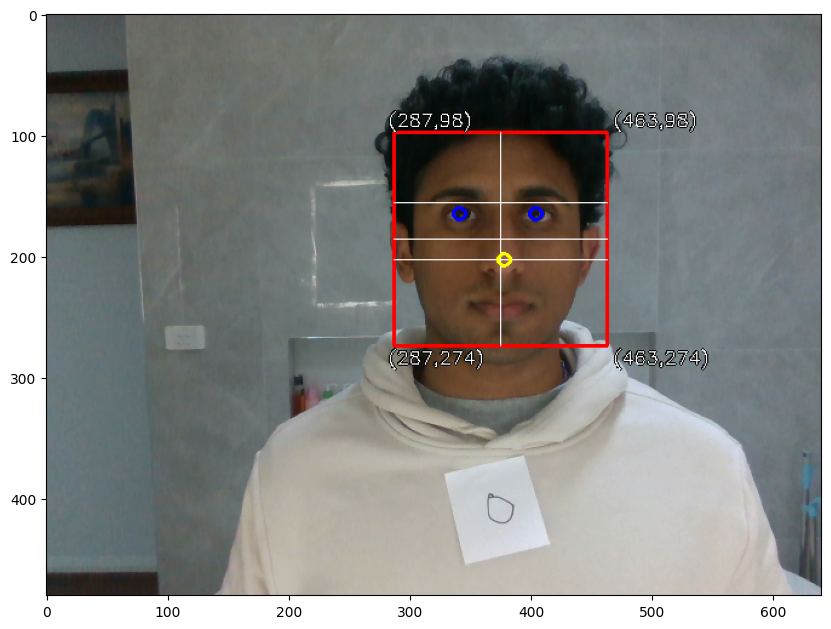

In [39]:
# Finding face
for (nx, ny, nw, nh) in nose:

    if (nw*nh)/(h*w) < 0.02:
        continue

    nose_center = (int(x + nx + nw/2), int(y + ny + nh/2))
    # Verify nose position relative to eyes
    if ('eye_left' in features and 'eye_right' in features and
        nose_center[1] > features['eye_left'][1] and
        nose_center[1] > features['eye_right'][1] and
        nose_center[0] > features['eye_left'][0] and
        nose_center[0] < features['eye_right'][0]):
        # cv2.rectangle(img2, (x + nx, y + ny), (x + nx + nw, y + ny + nh), (255, 0, 0), 2)
        # cv2.circle(img2, nose_center, 5, (255, 255, 0), 2)
        # print("Nose detected at:", nose_center)
        # features['nose'] = nose_center
        print(nw, nh)
        print((nw*nh)/(h*w))
        # Extract nose height map (correct coordinates)
        nose_height_map = height_m[y + ny:y + ny + nh, x + nx:x + nx + nw]

        expand = 35
        nose_height_map_wide = height_m[y + ny - expand : y + ny + nh + expand, x + nx - expand : x + nx + nw + expand]

        

        # print(nose_height_map[0:10, :])
        min_index = np.argmin(nose_height_map)  # Result: 1 (position of 1)
        row, col = np.unravel_index(min_index, nose_height_map.shape)  # Result: (0, 1)

        print("Tip of Nose detected at:", row, col)

        nose_depth = np.min(nose_height_map)

        nose_center = (int(x + nx + col), int(y + ny + row))
        cv2.circle(img2, nose_center, 5, (255, 255, 0), 2)
        print("Nose detected at:", nose_center)
        features['nose'] = [nose_center[0], nose_center[1], nose_depth]

        fig = plt.figure(figsize=(10, 30))
        # plt.subplot(311)
        # plt.imshow(nose_height_map, cmap='jet')
        # plt.subplot(312)
        # plt.imshow(img2)
        # plt.subplot(313)
        # plt.imshow(nose_height_map_wide, cmap='jet')

        plt.imshow(img2)

    else:
        print("No nose position constraints not met.")

try:
    print(features["nose"])
except KeyError:
    print("No nose found")

Mouth detected at: (378, 250)
34 58
[401 241] right mouth
[349 238] left mouth


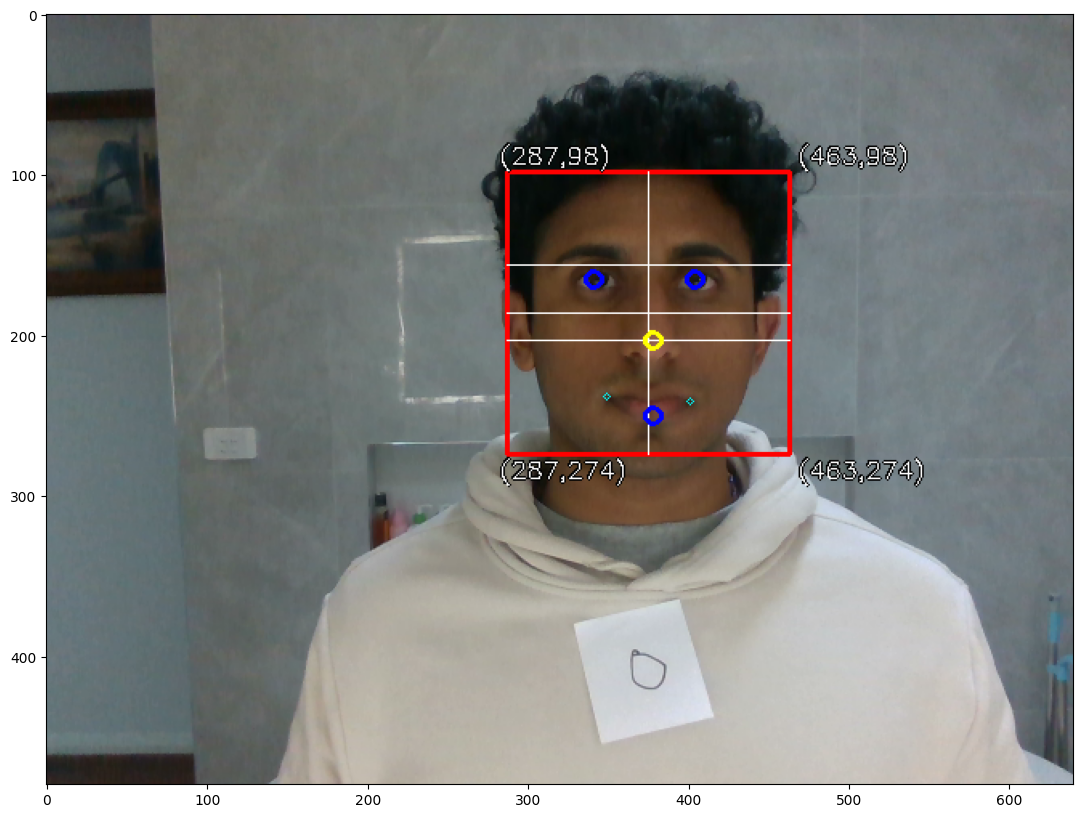

In [40]:
# Finding Mouth
exp_x = 0
exp_y = 0

fig = plt.figure(figsize = (20,10))

i = 0
for (mx, my, mw, mh) in mouth: 

    # if i == 0:
    #     i = i + 1
    #     continue

    mouth_center = (int(x + mx + mw/2), int(y + my + mh/2))
    if mouth_center[1] < features['nose'][1] + 0.2*h:
        print("Mouth y higher than nose y, skipping")
        continue
    
    exp_x = 0
    exp_y = int(mh * 0.15)

    # mouth_region = img1[y + my - exp : y + my + mh + exp, x + mx - exp: x + mx + mw + exp]
    mouth_region = img1[y + my + exp_y : y + my + mh - exp_y, x + mx - exp_x: x + mx + mw + exp_x]
    # mouth_region = img1[y + my - exp : y + my + mh + exp, features["eye_left"][0] : features["eye_right"][0] ]


    cv2.circle(img2, mouth_center, 5, (0, 0, 255), 2)
    
    
    features['mouth'] = mouth_center
    print("Mouth detected at:", mouth_center)

    mouth_region_gray = cv2.cvtColor(mouth_region, cv2.COLOR_RGB2GRAY)
    mouth_region_gray = cv2.equalizeHist(mouth_region_gray)

    mouth_hist = cv2.calcHist([mouth_region_gray], [0], None, [256], [0, 256])

    mean = np.mean(mouth_hist)
    stddev = np.std(mouth_hist)
    min = np.min(mouth_hist)
    max = np.max(mouth_hist)

    # contrast adjust the image
    A = min # some stretching parameters
    B = mean + 1 * stddev
    C = min
    D = max

    mouth_region_gray_adjusted = ((D-C)/(B-A))*(mouth_region_gray-A)+C # apply contrast adjustment
    mouth_region_gray_adjusted = np.clip(mouth_region_gray_adjusted, 0, 255).astype('uint8') # clip to [0,255] and convert to uint8

    thresh_val = 240
    set_val = 255
    ret, thresh_im1 = cv2.threshold(mouth_region_gray_adjusted, thresh_val, set_val, cv2.THRESH_BINARY)

    # plt.imshow(thresh_im1, cmap = "gray")

    mouth_region_binary_dilate= cv2.dilate(thresh_im1, None, iterations=1)

    plt.imshow(mouth_region_binary_dilate, cmap = "gray")


    black_mask = mouth_region_binary_dilate == 0

    rows, cols = np.where(black_mask)

    min_col_idx = np.argmin(cols)
    leftmost_row = rows[min_col_idx]
    leftmost_col = cols[min_col_idx]

    left_mouth = np.array([x + mx + leftmost_col + exp_x, y + my + leftmost_row + exp_y])
    # left_mouth = np.array([x  + leftmost_col, y + leftmost_row])


    min_col_idx = np.argmax(cols)
    rightmost_row = rows[min_col_idx]
    rightmost_col = cols[min_col_idx]

    right_mouth = np.array([x + mx + rightmost_col - exp_x, y + my + rightmost_row + exp_y])
    # right_mouth = np.array([x + rightmost_col, y + rightmost_row])


    features["right_mouth"] = right_mouth
    features["left_mouth"] = left_mouth
    features["mid_mouth"] = np.array([int((right_mouth[0] + left_mouth[0])//2), int((right_mouth[1] + left_mouth[1])//2), height_m[int((right_mouth[0] + left_mouth[0])//2), int((right_mouth[1] + left_mouth[1])//2)]])
    # plt.imshow(mouth_region_binary_dilate, cmap="gray")
    # plt.imshow(mouth_region_gray_adjusted, cmap ="gray")
    # plt.imshow(thresh_im1, cmap="gray")
    # break

    cv2.circle(img2, (left_mouth[0], left_mouth[1]), 2, (0, 255, 255), 1)
    # cv2.circle(img2, (x + mx + leftmost_col, y + my + leftmost_row), 2, (0, 255, 255), 1)

    cv2.circle(img2, (right_mouth[0], right_mouth[1]), 2, (0, 255, 255), 1)

    print(mh, mw)

    # plt.imshow(img2)
    break

try:
    print(features["right_mouth"], "right mouth")
    print(features["left_mouth"], "left mouth")
    plt.imshow(img2)
except KeyError:
    print("no valid mouth")
# plt.subplot(131)
# plt.imshow(mouth_region_gray_adjusted[ :, :int(mouth_region_gray_adjusted.shape[1]/2)], cmap="gray")
# plt.subplot(132)
# plt.imshow(mouth_region_gray_adjusted[:, int(mouth_region_gray_adjusted.shape[1]/2):], cmap="gray")
# plt.subplot(133)
# plt.imshow(mouth_region_binary_dilate)


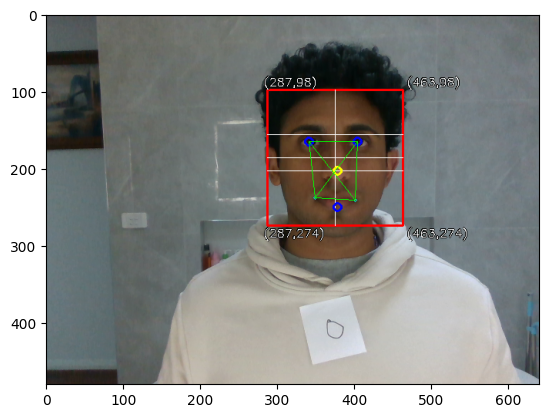

In [41]:
# Drawing lines
cv2.line(img2, (int(features["eye_left"][0]), int(features["eye_left"][1])), (int(features["right_mouth"][0]), int(features["right_mouth"][1])), (0, 255, 0), 1)
cv2.line(img2, (int(features["eye_right"][0]), int(features["eye_right"][1])), (int(features["left_mouth"][0]), int(features["left_mouth"][1])), (0, 255, 0), 1)

cv2.line(img2, (int(features["right_mouth"][0]), int(features["right_mouth"][1])), (int(features["left_mouth"][0]), int(features["left_mouth"][1])), (0, 255, 0), 1)
cv2.line(img2, (int(features["eye_right"][0]), int(features["eye_right"][1])), (int(features["eye_left"][0]), int(features["eye_left"][1])), (0, 255, 0), 1)

cv2.line(img2, (int(features["eye_left"][0]), int(features["eye_left"][1])), (int(features["left_mouth"][0]), int(features["left_mouth"][1])), (0, 255, 0), 1)
cv2.line(img2, (int(features["eye_right"][0]), int(features["eye_right"][1])), (int(features["right_mouth"][0]), int(features["right_mouth"][1])), (0, 255, 0), 1)

plt.imshow(img2)

In [42]:

# left_mouth_vec = features["left_mouth"][:2]
# right_mouth_vec = features["right_mouth"][:2]

# print(left_eye_vec)
# print(right_eye_vec)
# print(nose_vec)
# print(left_mouth_vec)
# print(right_mouth_vec)


# mouth_axis_vec = right_mouth_vec - left_mouth_vec

# inter_mouth_distance = np.linalg.norm(mouth_axis_vec)
# if inter_mouth_distance == 0:
#     raise ValueError("Left and right mouth coordinates are identical.")

# print(inter_mouth_distance)
# print(features["eye_left"])

In [43]:
# YAW calculation

left_eye_vec = np.array(features["eye_left"])[:2]
right_eye_vec = np.array(features["eye_right"])[:2]
nose_vec = np.array([features["nose"]])[0][:2]


eye_axis_vec = right_eye_vec - left_eye_vec

inter_eye_distance = np.linalg.norm(eye_axis_vec)
if inter_eye_distance == 0:
    raise ValueError("Left and right eye coordinates are identical.")

# print(inter_eye_distance)

# print(inter_eye_distance, " - inter eye distance along the axis of the eyes")
# Unit vector along the eye axis
eye_axis_unit = eye_axis_vec / inter_eye_distance

# Vector from left eye to nose
left_to_nose = nose_vec - left_eye_vec

# Scalar projection of nose position onto the eye axis
nose_projection = np.dot(left_to_nose, eye_axis_unit)

# print(nose_projection, " - distance from left eye to nose along the axis of the eyes")
# Normalized position along the axis (-0.5 to +0.5 for centered nose)
normalized_position = nose_projection / inter_eye_distance
# print(normalized_position, " - inter eye distance to nose displacement ratio from left eye")

# Vector from left eye to nose
right_to_nose = nose_vec - right_eye_vec

# Scalar projection of nose position onto the eye axis
nose_projection = np.dot(right_to_nose, eye_axis_unit)

# print(nose_projection, " - distance from the right eye to the nose along the axis of the eyes")
# Normalized position along the axis (-0.5 to +0.5 for centered nose)
normalized_position = nose_projection / inter_eye_distance
# print(normalized_position, " - inter eye distance to nose displacement ratio from right eye")

# Asymmetry ratio (optional alternative metric)
# Maps normalized_position = 0 → 1.0 (symmetric)
# Positive values indicate shift toward right eye
denom_left = 0.5 - normalized_position
denom_right = 0.5 + normalized_position
asymmetry_ratio_yaw = (denom_right / denom_left) if denom_left != 0 else float('inf')

yaw_deg = asymmetry_ratio_yaw * 180
# print(asymmetry_ratio, " - asymmetry ratio (right/left)")
# print(asymmetry_ratio * 180, " - yaw in degrees (approximate)")
# print(np.degrees(np.arcsin(asymmetry_ratio)), " - yaw in degrees (approximate)")



In [44]:
# roll calculation

planar_vec = np.array([0, 1])  # reference up direction (y-axis)
orth_vec = np.array([-eye_axis_unit[1], eye_axis_unit[0]])  # perpendicular to eye axis

# Normalize both vectors (just to be safe)
planar_vec = planar_vec / np.linalg.norm(planar_vec)
orth_vec = orth_vec / np.linalg.norm(orth_vec)

# Compute signed angle using atan2
roll_rad = np.arctan2(
    np.cross(planar_vec, orth_vec),   # sine term (determines sign)
    np.dot(planar_vec, orth_vec)      # cosine term
)

roll_deg = np.degrees(roll_rad)
print("Head roll (signed):", roll_deg)

Head roll (signed): 0.0


/tmp/ipykernel_7014/4164108323.py:12: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  np.cross(planar_vec, orth_vec),   # sine term (determines sign)


74.0


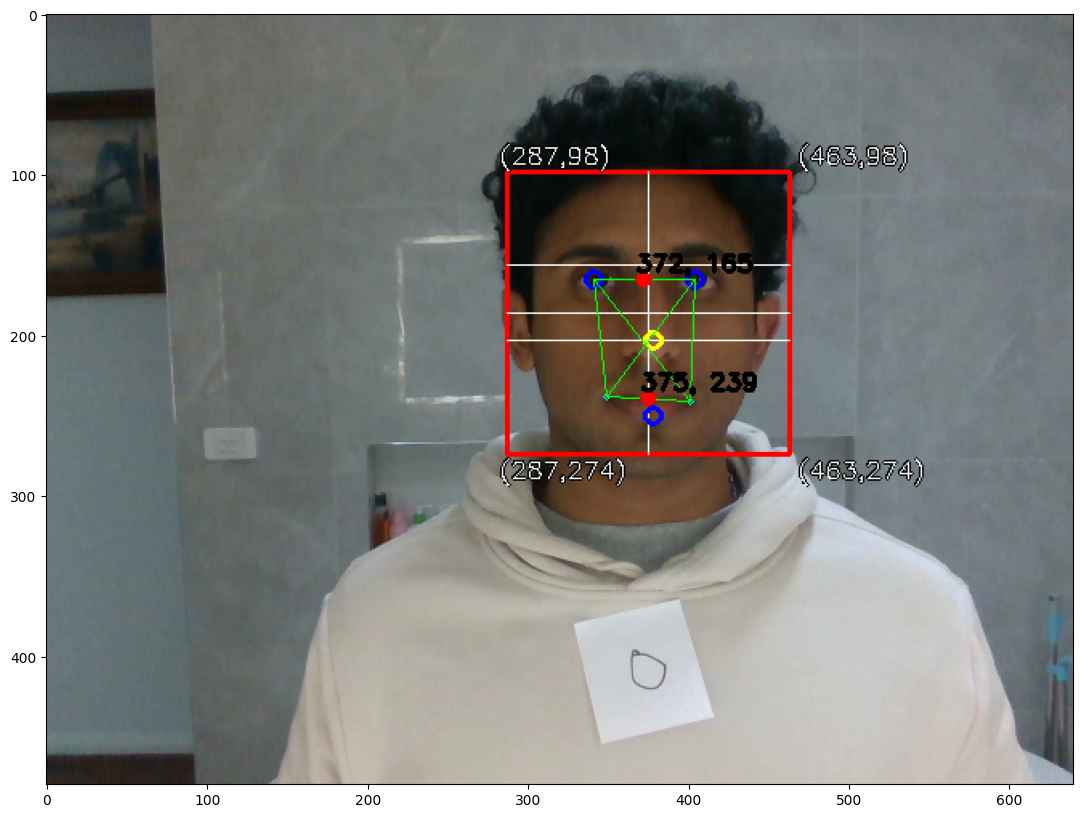

In [45]:
# Plotting midpoints
print(-features["eye_midpoint"][1] + features["mid_mouth"][1])

eye_midpoint = features["eye_midpoint"]
t1 = f"{int(eye_midpoint[0])}, {int(eye_midpoint[1])}"
cv2.circle(img2, (int(features["eye_midpoint"][0]), int(features["eye_midpoint"][1])), 2, (255, 0, 0), 5)
cv2.putText(img2, t1, (int(eye_midpoint[0])-5, int(eye_midpoint[1])-5), font, font_scale, (0, 0, 0), thickness+1)

mouth_midpoint = features["mid_mouth"]
t2 = f"{int(mouth_midpoint[0])}, {int(mouth_midpoint[1])}"
cv2.circle(img2, (int(features["mid_mouth"][0]), int(features["mid_mouth"][1])), 2, (255, 0, 0), 5)
cv2.putText(img2, t2, (int(mouth_midpoint[0])-5, int(mouth_midpoint[1])-5), font, font_scale, (0, 0, 0), thickness+1)

fig = plt.figure(figsize = (20,10))
plt.imshow(img2)


In [49]:
# Pitch Calculation

mid_to_mid = np.array([features["mid_mouth"][:2]]) - np.array([features["eye_midpoint"][:2]])
# print(np.array([features["nose"][:2]]))
# print(np.array([features["eye_midpoint"][:2]]))
eye_mid_to_nose = np.array([features["nose"][:2]]) - np.array([features["eye_midpoint"][:2]])


# Flatten to 1D vectors
A = eye_mid_to_nose.ravel()   # or eye_mid_to_nose[0]
B = mid_to_mid.ravel()        # or mid_to_mid[0]

# Scalar projection of A onto B
pitch_proj = np.dot(A, B) / np.linalg.norm(B)

# print(mid_to_mid)
# print(eye_mid_to_nose)

# print(pitch_proj)

# Normalized position along the axis (-0.5 to +0.5 for centered nose)
normalized_position = pitch_proj /  np.linalg.norm(mid_to_mid)
# print(normalized_position, " - inter eye distance to nose displacement ratio from right eye")

# Asymmetry ratio (optional alternative metric)
# Maps normalized_position = 0 → 1.0 (symmetric)
# Positive values indicate shift toward right eye
denom_down = 0.5 - normalized_position
denom_up = 0.5 + normalized_position
asymmetry_ratio_pitch = (denom_down / denom_up) if denom_up != 0 else float('inf')

pitch_deg = asymmetry_ratio_pitch * 180

print(pitch_deg, "pitch")
# print(asymmetry_ratio, " - asymmetry ratio (right/left)")
# print(asymmetry_ratio_pitch * 180, " - pitch in degrees (approximate)")
# print(np.degrees(np.arcsin(asymmetry_ratio)), " - yaw in degrees (approximate)")

-2.82637954239571 pitch


In [47]:
print(pitch_deg, "pitch")
print(roll_deg, "roll")
print(yaw_deg, "yaw")


-2.82637954239571 pitch
0.0 roll
17.21739130434783 yaw


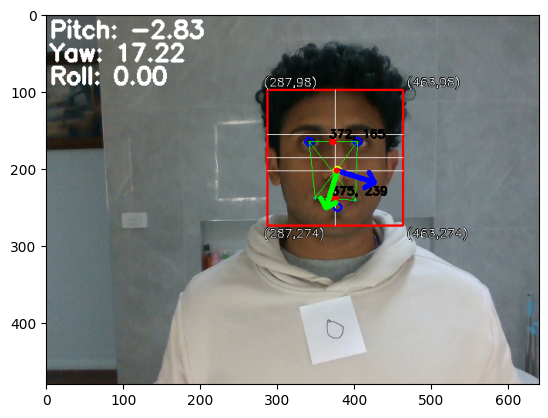

In [48]:
Rx = np.array([
    [1, 0, 0], 
    [0, math.cos(math.radians(roll_deg)), -math.sin(math.radians(roll_deg))], 
    [0, math.sin(math.radians(roll_deg)), math.cos(math.radians(roll_deg))]
    ])

Ry = np.array([
    [math.cos(math.radians(pitch_deg)), 0, math.sin(math.radians(pitch_deg))],
    [0, 1, 0],
    [-math.sin(math.radians(pitch_deg)), 0, math.cos(math.radians(pitch_deg))]
    ])

Rz = np.array([
    [math.cos(math.radians(yaw_deg)), -math.sin(math.radians(yaw_deg)), 0],
    [math.sin(math.radians(yaw_deg)), math.cos(math.radians(yaw_deg)), 0],
    [0, 0, 1]
    ])

R = Rz @ Ry @ Rx

arrow_length = 50

# Define unit vectors in the local frame
axes = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]], 
    dtype=np.float32)  # X, Y, Z

# Transform and scale axes
directions = (R @ axes.T).T  # Shape: (3, 3)
directions = directions / np.linalg.norm(directions, axis=1)[:, np.newaxis]  # Normalize
directions *= arrow_length  # Scale to desired length

# Convert to pixel endpoints
endpoints = np.round(directions[:, :2]).astype(int)  # Only x, y components
colors = [(0, 0, 255), (0, 255, 0), (255, 0, 0)]  # BGR: Red, Green, Blue

thickness = 5

for i, (dx, dy) in enumerate(endpoints):
    end_x = features["nose"][0] + dx
    end_y = features["nose"][1] + dy
    color = colors[i]
    cv2.arrowedLine(img2, (features["nose"][0], features["nose"][1]), (end_x, end_y), color, thickness, tipLength=0.3)
# i = 2
# dx, dy = endpoints[i]
# end_x = features["nose"][0] + dx
# end_y = features["nose"][1] + dy
# color = colors[i]
# cv2.arrowedLine(img2, (features["nose"][0], features["nose"][1]), (end_x, end_y), color, thickness, tipLength=0.3)

font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 1
thickness = 2
text_roll = f"Roll: {roll_deg:.2f}"
text_pitch = f"Pitch: {pitch_deg:.2f}"
text_yaw = f"Yaw: {yaw_deg:.2f}"
cv2.putText(img2, text_pitch, (5, 30), font, font_scale, (255, 255, 255), thickness+1)
cv2.putText(img2, text_yaw, (5, 30+30), font, font_scale, (255, 255, 255), thickness+1)
cv2.putText(img2, text_roll, (5, 30+60), font, font_scale, (255, 255, 255), thickness+1)

plt.imshow(img2)

55cm

30cm -> 30deg

15cm -> 15deg
